In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-data/heart_disease_uci.csv


# **Load and explore data**

In [2]:
import pandas as pd

df = pd.read_csv('../input/heart-disease-data/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.shape

(920, 16)

**Distribution of age**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

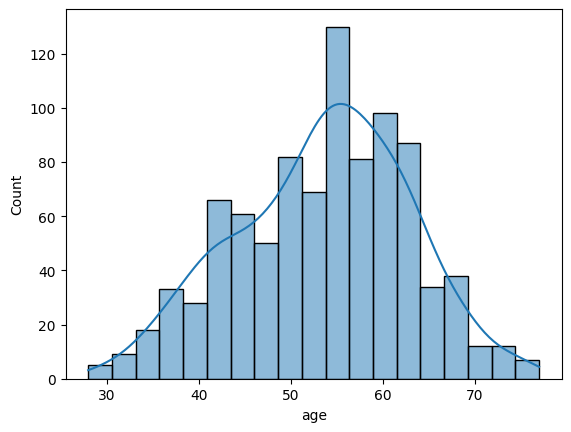

In [4]:
import seaborn as sns
sns.histplot(df['age'], kde=True)

**Gender based distribution**

In [5]:
m = df[df['sex'] == 'Male'].shape[0]
f = df[df['sex'] == 'Female'].shape[0]
total = m + f
percentage_m = (m / total) * 100
percentage_f = (f / total) * 100
print("Percentage Male: ", round(percentage_m,2), "%")
print("Percentage Female: ", round(percentage_f,2), "%")

Percentage Male:  78.91 %
Percentage Female:  21.09 %


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sex', ylabel='Count'>

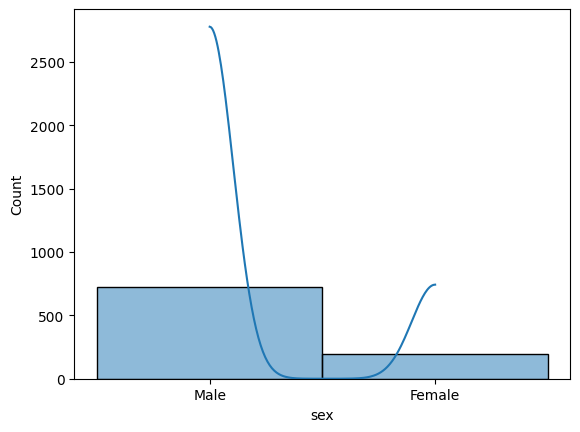

In [6]:
sns.histplot(df['sex'], kde=True)

**Chest Pain types distribution **

In [7]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

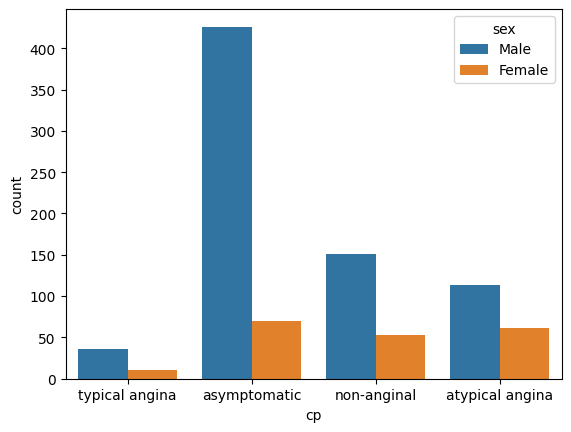

In [8]:
sns.countplot(df, x='cp', hue='sex')

In [9]:
import plotly.express as px

fig = px.pie(df, names='cp', title='Distribution of Chest Pain Type')
fig.show()

**Heatmap of the correlation matrix for the numeric columns **

<Axes: >

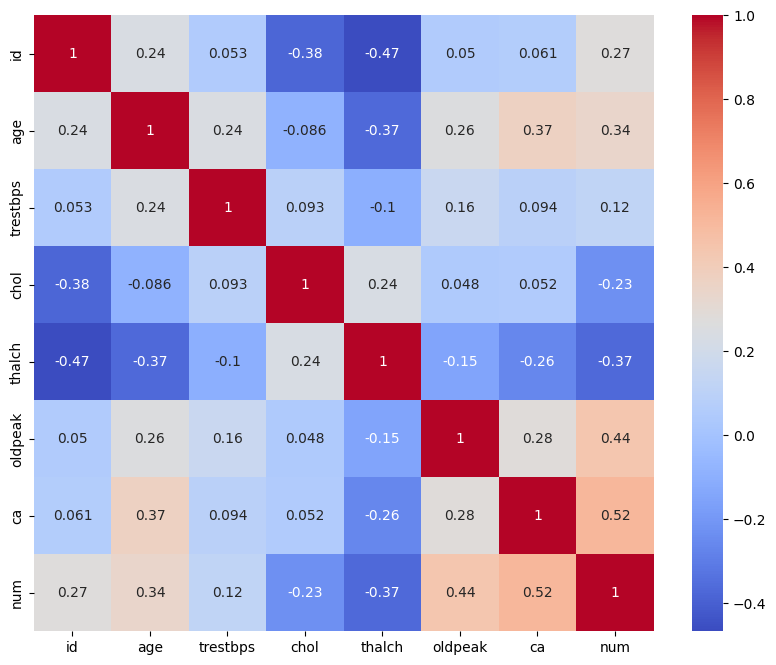

In [10]:
import numpy as np
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=np.number)
corr = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# **Boxplots - outliers**

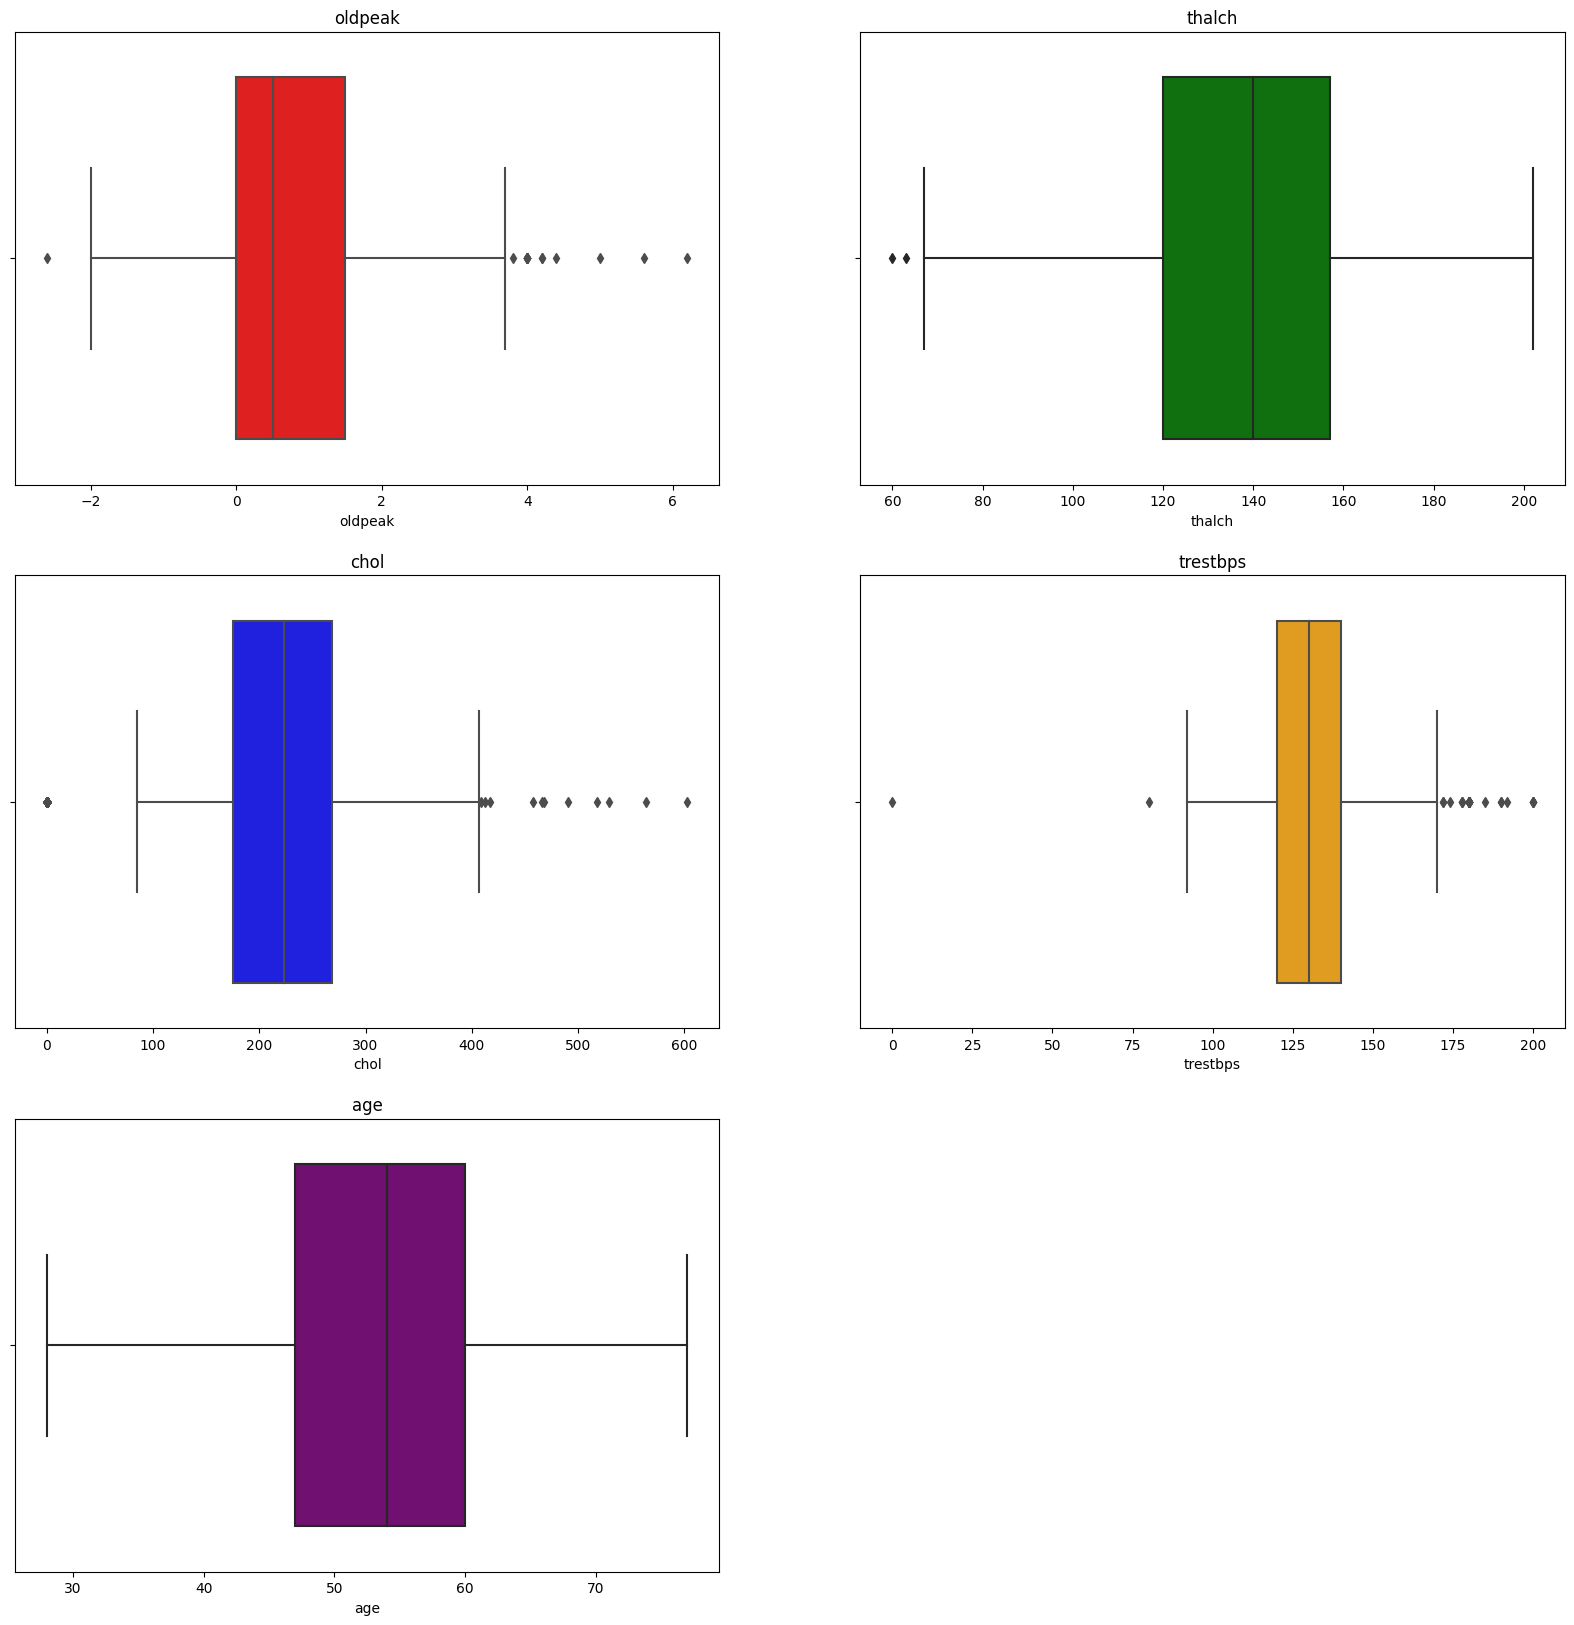

In [11]:
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(['oldpeak', 'thalch', 'chol', 'trestbps', 'age']):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

# **Missing values**

Drop id and dataset columns

In [12]:
df = df.drop(['id', 'dataset'], axis=1)

In [13]:
df.isnull().sum().sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
age           0
sex           0
cp            0
num           0
dtype: int64

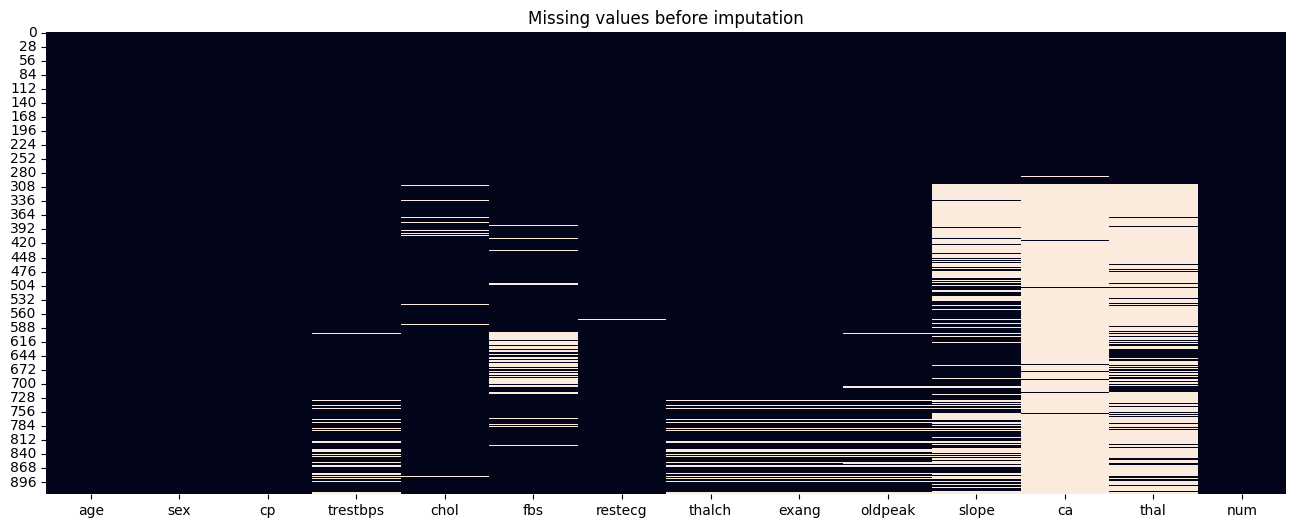

In [14]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values before imputation')
plt.show()

Impute columns with lower percentage of missing values

In [15]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

cat_imputer = SimpleImputer(strategy='most_frequent')
cat_columns = ['fbs', 'exang', 'restecg']

df[cat_columns] = cat_imputer.fit_transform(df[cat_columns]) 

num_imputer = IterativeImputer(max_iter=10, random_state=42)
num_columns = ['oldpeak', 'trestbps', 'thalch', 'chol']

df[num_columns] = num_imputer.fit_transform(df[num_columns])

**Drop columns with high percentage of missing values**

In [16]:
df = df.drop(['ca', 'thal', 'slope'], axis='columns')

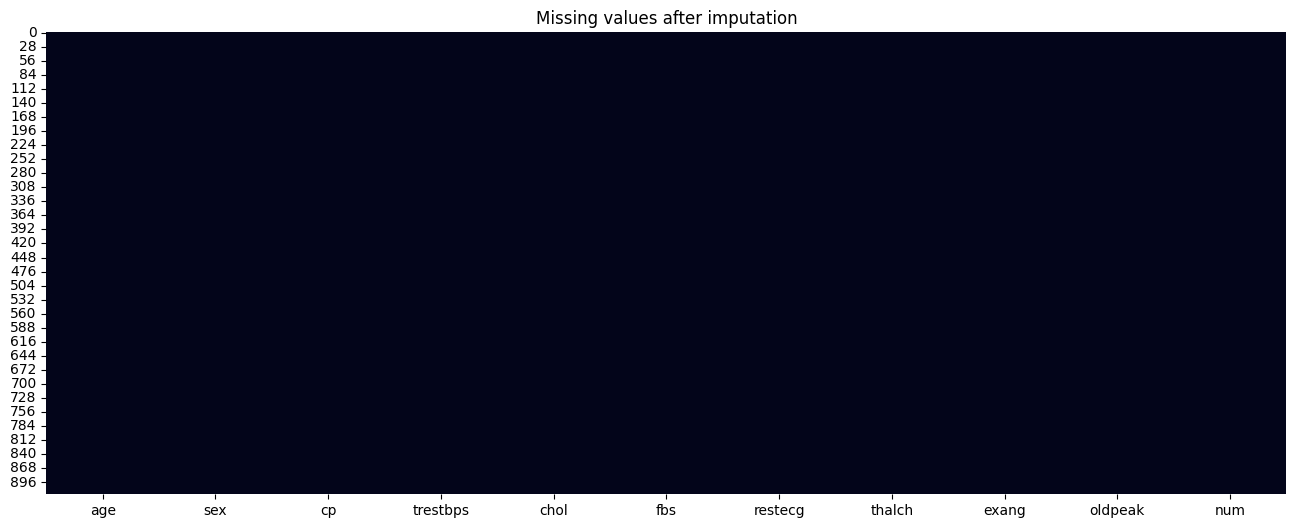

In [17]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values after imputation')
plt.show()

# **Encode values**

Encode each column with a separate Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder
to_encode = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

encoders = {}

for column in to_encode:
    if column in df.columns:
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])
        encoders[column] = encoder
        
print(df)

     age  sex  cp    trestbps   chol  fbs  restecg      thalch  exang  \
0     63    1   3  145.000000  233.0    1        0  150.000000      0   
1     67    1   0  160.000000  286.0    0        0  108.000000      1   
2     67    1   0  120.000000  229.0    0        0  129.000000      1   
3     37    1   2  130.000000  250.0    0        1  187.000000      0   
4     41    0   1  130.000000  204.0    0        0  172.000000      0   
..   ...  ...  ..         ...    ...  ...      ...         ...    ...   
915   54    0   0  127.000000  333.0    1        2  154.000000      0   
916   62    1   3  131.125260  139.0    0        2  134.104735      0   
917   55    1   0  122.000000  223.0    1        2  100.000000      0   
918   58    1   0  135.252702  385.0    1        0  148.124142      0   
919   62    1   1  120.000000  254.0    0        0   93.000000      1   

      oldpeak  num  
0    2.300000    0  
1    1.500000    2  
2    2.600000    1  
3    3.500000    0  
4    1.400000    0

# **Make predictions**

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

Split the dataset

In [20]:
y = df['num']
X = df.drop(['num'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Naive Bayes Classifier**

In [21]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)

print('NB results:')
print(f'Accuracy: {accuracy_score(preds, y_test)}')
print(f'Precision: {precision_score(preds, y_test, average="micro")}')
print(f'Recall: {recall_score(preds, y_test, average="micro")}')
print(f'F1 score: {f1_score(preds, y_test, average="micro")}')

NB results:
Accuracy: 0.5271739130434783
Precision: 0.5271739130434783
Recall: 0.5271739130434783
F1 score: 0.5271739130434783


# **Linear Discriminant Analysis**

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
preds = lda.predict(X_test)

print('LDA results:')
print(f'Accuracy: {accuracy_score(preds, y_test)}')
print(f'Precision: {precision_score(preds, y_test, average="micro")}')
print(f'Recall: {recall_score(preds, y_test, average="micro")}')
print(f'F1 score: {f1_score(preds, y_test, average="micro")}')

LDA results:
Accuracy: 0.5380434782608695
Precision: 0.5380434782608695
Recall: 0.5380434782608695
F1 score: 0.5380434782608695


Priors:

In [23]:
lda.priors_

array([0.45652174, 0.28668478, 0.11413043, 0.11005435, 0.0326087 ])

# **Quadratic Discriminant Analysis**

In [24]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
preds = qda.predict(X_test)

print('QDA results:')
print(f'Accuracy: {accuracy_score(preds, y_test)}')
print(f'Precision: {precision_score(preds, y_test, average="micro")}')
print(f'Recall: {recall_score(preds, y_test, average="micro")}')
print(f'F1 score: {f1_score(preds, y_test, average="micro")}')

QDA results:
Accuracy: 0.532608695652174
Precision: 0.532608695652174
Recall: 0.532608695652174
F1 score: 0.532608695652174


Priors:

In [25]:
qda.priors_

array([0.45652174, 0.28668478, 0.11413043, 0.11005435, 0.0326087 ])

# **Conclusion**

It can be observed that the accuracy of the Naive Bayes is slightly lower than that of the LDA and QDA, which may be attributed to its indifference towards the dependency between attribute values and class labels.

It should be noted that all three accuracies are relatively low, indicating that more comprehensive feature engineering is necessary to gain better insights into the problem.